# Exercice 1

Pour $n \in \mathbb{N}^*$, on s'intéresse au calcul du polynôme (algébrique)
de degré inférieur ou égal à $n$ qui interpole la fonction $f$ en $n+1$
points équidistants $(x_k)_{k=0}^n$ de l'intervalle $I = [0,1]$.

On cherche ce polynôme sous la forme
\[
I_n f(x) = \sum_{k=0}^{n} a_k x^k.
\]

On définit les vecteurs
\[
a = (a_0, \dots, a_n)^T
\quad \text{et} \quad
y = (f(x_0), \dots, f(x_n))^T.
\]


## 1. Question

Écrire une fonction calculant la matrice \( M \) telle que
\[
M a = y.
\]


---

## 2.  
Pour résoudre ce système linéaire, utiliser la fonction `inv` de la bibliothèque `linalg` de `numpy` qui calcule l’inverse d’une matrice.

**Application** : $f(x) = e^{3x} \sin(6x)$ et $n = 10, 15, 20, 25, \dots$

Représenter sur un même graphique la fonction $f$ et le polynôme $I_n f$.  
*Utiliser un grand nombre de points pour représenter assez finement les fonctions (car si on ne les représente qu’aux points d’interpolation, elles coïncident, bien sûr !).*


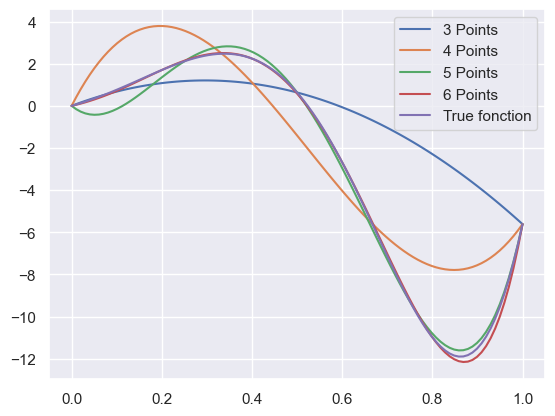

In [32]:
import numpy as np

#on doit resoudre un système linéaire étant donnée X = [x_0,,....,x_n] et Y=[f(x_0),.....,f(x_n)]
#M en effet est la matrice de vandermonde où chaque colomne 'i' est [x_0**i,.....,x_n**i]

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")


def vandermonde_matrix(X):
    return np.vander(X, increasing=True)

def inverseM_solve(M, Y):
    invM = np.linalg.inv(M)
    return invM@Y

def f(x):
    return np.exp(3*x)*np.sin(6*x)

def poly(A, x):
    r = 0
    for i in range(len(A)):
        r += A[i]*x**i
    return r

fig, ax = plt.subplots()

for i in range(3,7):
    X = np.linspace(0,1,i)
    Y = f(X)
    M = vandermonde_matrix(X)
    A = inverseM_solve(M,Y)

    ax.plot(np.linspace(0,1,100), poly(A, np.linspace(0,1,100)), label=f"{i} Points")
ax.plot(np.linspace(0,1,100), f(np.linspace(0,1,100)), label="True fonction")
plt.legend()
plt.show()










---

## 3.  
Mêmes questions en utilisant la fonction `solve` de la même bibliothèque qui résout les systèmes linéaires.

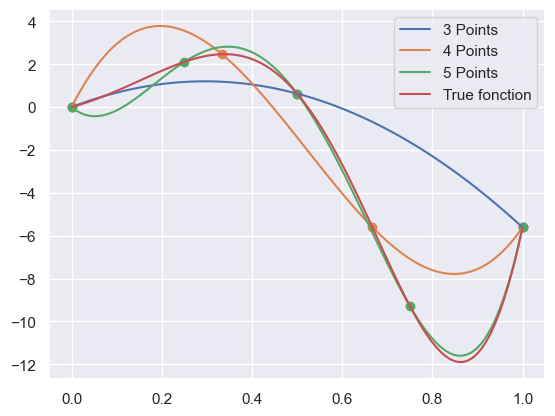

In [ ]:
import numpy as np

#on doit resoudre un système linéaire étant donnée X = [x_0,,....,x_n] et Y=[f(x_0),.....,f(x_n)]
#M en effet est la matrice de vandermonde où chaque colomne 'i' est [x_0**i,.....,x_n**i]

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")


def vandermonde_matrix(X):
    return np.vander(X, increasing=True)

def solve(M, Y):
    return np.linalg.solve(M,Y)

def f(x):
    return np.exp(3*x)*np.sin(6*x)

def poly(A, x):
    r = 0
    for i in range(len(A)):
        r += A[i]*x**i
    return r

fig, ax = plt.subplots()

for i in range(3,7):
    X = np.linspace(0,1,i)
    Y = f(X)
    M = vandermonde_matrix(X)
    A = inverseM_solve(M,Y)

    ax.scatter(X, poly(A,X))
    ax.plot(np.linspace(0,1,100), poly(A, np.linspace(0,1,100)), label=f"{i} Points")
ax.plot(np.linspace(0,1,100), f(np.linspace(0,1,100)), label="True fonction")
plt.legend()
plt.show()










# **Exercice 2 : Interpolation trigonométrique (via la résolution d'un système linéaire)**

## **Énoncé**

Soit la fonction $2\pi$-périodique définie sur $[0, 2\pi]$ par :

$$
f(x) = e^{x} \sin(2x)
$$

Pour $N \in \mathbb{N}^*$ et $k = 0, \dots, N-1$, on définit :
$$
x_k = kh \quad \text{avec} \quad h = \frac{2\pi}{N}
$$
et
$$
z_k = e^{i x_k}
$$

On cherche le polynôme trigonométrique interpolant $f$ aux points $x_k$ sous la forme :
$$
I_N f(x) = \sum_{k=-N+1}^{N} a_k e^{ikx}
$$

---

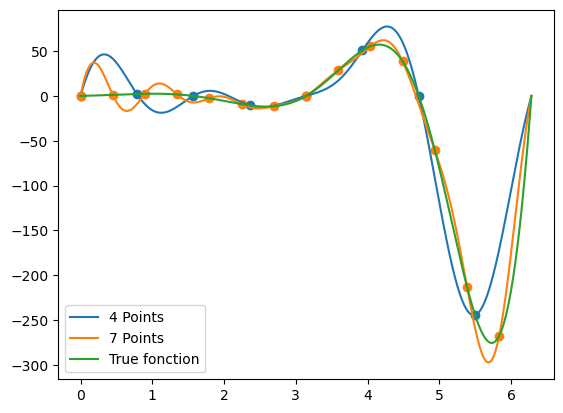

In [27]:
#on va essayer d'utiliser un méthode similaire a l'anterieur
import numpy as np
import matplotlib.pyplot as plt


def matrix(Z):
    M = []
    for i in range(-N+1, N+1):
        M.append(Z**i)
    return np.array(M).T


def solve(M, Y):
    return np.linalg.solve(M,Y)

def f(x):
    return np.exp(x)*np.sin(2*x)

def poly(A, x):
    r = 0
    for i in range(0, 2*N):
        r += A[i]*np.exp((i-N+1)*1j*x)
    return r

n = [4,7]
fig, ax = plt.subplots()

for N in n:
    h =2*np.pi/(2*N)

    X = h*np.arange(2*N)
    Z = np.exp(1j*X)


    Y = f(X)
    M = matrix(Z)
    A = solve(M,Y)

    ax.scatter(X, poly(A,X))
    ax.plot(np.linspace(0,2*np.pi,1000), poly(A, np.linspace(0,2*np.pi,1000)), label=f"{N} Points")
ax.plot(np.linspace(0,2*np.pi,1000), f(np.linspace(0,2*np.pi,1000)), label="True fonction")
plt.legend()
plt.show()



# Exercice 3 : Interpolation trigonométrique (via la série de Fourier discrète)

## 1. Fonction `Points(N)`
Écrire une fonction `Points(N)` qui renvoie un tableau contenant les points d'interpolation :
\[
x_k = \frac{k\pi}{N} \quad \text{pour} \quad k = 0, \dots, 2N-1.
\]

---

In [77]:
def point(N):
    return np.arange(2*N)*np.pi/N

## 2. Fonction `CoeffFD(x, y)`
Écrire une fonction `CoeffFD(x, y)` qui, à partir de :
- Un tableau `x` contenant les points d'interpolation,
- Un tableau `y` contenant les valeurs \( y_k \),

calcule les coefficients de Fourier discrets \( (\hat{f}_j)_{j=-N+1}^{N} \) :
\[
\hat{f}_j = \frac{1}{2N} \sum_{k=0}^{2N-1} y_k \, e^{-ijx_k}.
\]

**Note** : Chaque \( y_k \) est censé être la valeur au point \( x_k \) d'une fonction \( 2\pi \)-périodique \( f \) :  
\[
y_k = f(x_k).
\]

---

In [81]:
def exponential_sum(i,P,Y):
    r = 0
    for k in range(len(P)):
        r+=Y[k]*np.exp(-1j*(i-len(P)/2+1)*P[k])
    return 1/(len(P))*r


def CoeffFD(P,Y):
    F = np.zeros(len(P), dtype=complex)
    for j in range(len(P)):
        F[j] = exponential_sum(j,P,Y)
    return F

## 3. Fonction `Interpol`
Écrire une fonction `Interpol` calculant les valeurs du polynôme d'interpolation trigonométrique sur une grille de points `X`.

**Paramètres d'entrée** :
- Les coefficients discrets calculés par `CoeffFD`,
- Le tableau `X`.


## Application
Pour la fonction :
\[
f(x) = e^{x/2} \sin(2x),
\]
représenter sur une même figure :

1. La fonction \( f \) et son interpolée sur \([0, 2\pi]\).
2. La fonction \( f \) et son interpolée sur \([0, 7]\).

**Commenter les résultats**.

In [82]:
def Interpol(X, F):
    Y = np.zeros(len(X), dtype=complex)
    for i in range(0, len(F)):
        Y += F[i]*np.exp(1j*(i-len(F)/2+1)*X)
    return Y

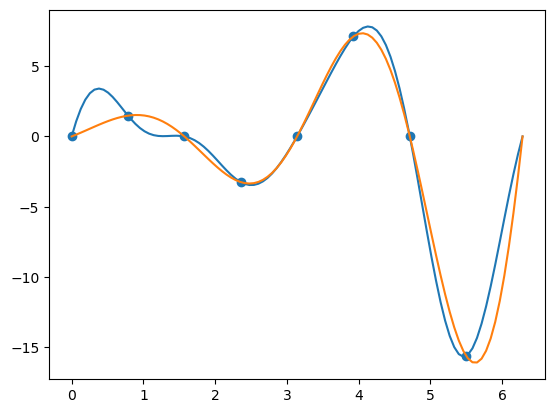

In [86]:
import matplotlib.pyplot as plt

def f(x):
    return np.exp(x/2)*np.sin(2*x)

#on represente la fonction et son interpolée sur [0, 2pi]
n = 4
P = point(n)
Y = f(P)
F = CoeffFD(P, Y)
S = np.linspace(0, np.pi*2, 100)

fig, ax = plt.subplots()
ax.scatter(P, Interpol(P,F))
ax.plot(S, Interpol(S, F), label=f"Interpolation of {n} points")
ax.plot(S, f(S), label="True function")

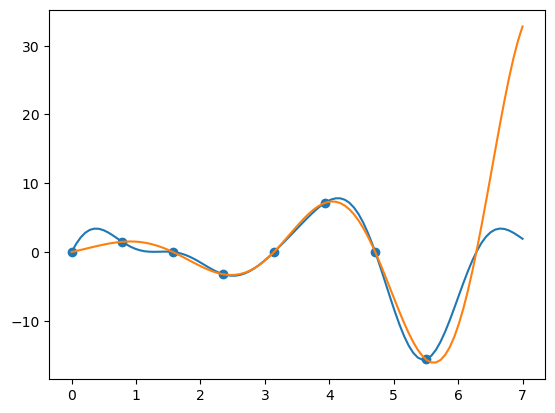

In [ ]:
import matplotlib.pyplot as plt

def f(x):
    return np.exp(x/2)*np.sin(2*x)

#on represente la fonction et son interpolée sur [0, 7]
n = 4
P = point(n)
Y = f(P)
F = CoeffFD(P, Y)
S = np.linspace(0,7, 100)

fig, ax = plt.subplots()
ax.scatter(P, Interpol(P,F))
ax.plot(S, Interpol(S, F), label=f"Interpolation of {n} points")
ax.plot(S, f(S), label="True function")